In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
import fastf1
from src.plotset import setup_plot
from fastf1 import plotting

#setup_plot()

In [2]:
fastf1.Cache.enable_cache('./f1_cache')
fastf1.Cache.get_cache_info()

('./f1_cache', 2294980302)

In [101]:
session = fastf1.get_session(2024, 14, 'R')
weekend = session.event
session.load()

core           INFO 	Loading data for Belgian Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

In [102]:
lap = session.laps.pick_fastest()

In [105]:
x = lap.telemetry['X']
y = lap.telemetry['Y']
color = lap.telemetry['Speed']

In [107]:
points = np.array([-y, x]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

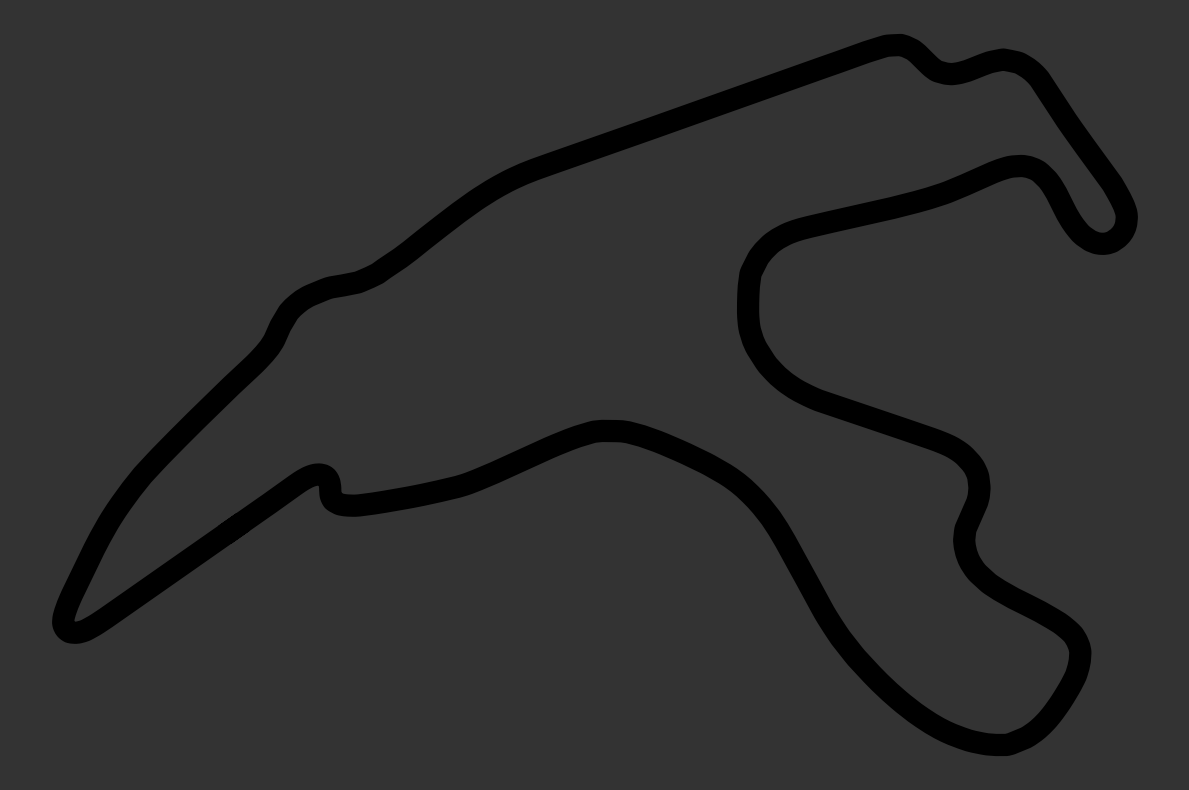

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor('#333333')
ax.axis('off')
ax.plot(-y, x,
        color='#000000', linestyle='-', linewidth=16, zorder=0)

norm = plt.Normalize(color.min(), color.max())
colormap = mpl.cm.plasma
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=10)

lc.set_array(color)

# line = ax.add_collection(lc)

# cbaxes = fig.add_axes([0.15, 0.05, 0.5, 0.05])
# normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
# legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
#                                    orientation="horizontal")

# for label in legend.ax.get_xticklabels():
#     label.set_fontsize(16)
#     label.set_fontweight('bold')
#     label.set_color('w')

# legend.ax.set_title('Speed (kmph)',color='w',fontdict=dict(fontsize=18,fontweight='bold'))
plt.tight_layout()
plt.show()

In [ ]:
# Set animation size limit
from matplotlib import rcParams
rcParams['animation.embed_limit'] = 200

# Enable ffmpeg
rcParams['animation.ffmpeg_path'] = r"C:\Users\rushi\AppData\Local\ffmpeg-7.1.1-essentials_build\bin\ffmpeg.exe"

In [110]:
len(segments)

762

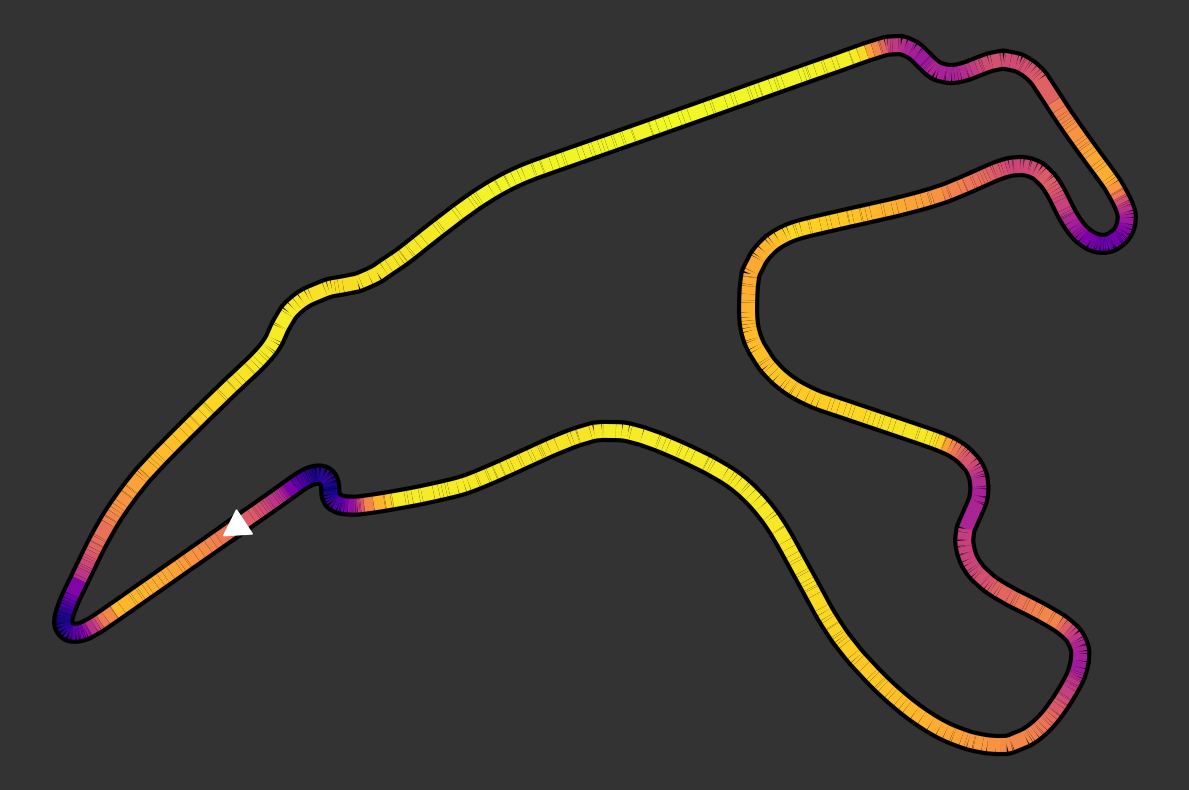

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
fig.set_facecolor('#333333')
ax.plot(-y, x,
        color='#000000', linestyle='-', linewidth=16, zorder=0)

norm = plt.Normalize(color.min(), color.max())
colormap = mpl.cm.plasma

lc = LineCollection([], cmap=colormap, norm=norm, linestyle='-', linewidth=10)
line = ax.add_collection(lc)

car, = ax.plot([], [], marker='^',color='w', markersize=24)

def update(frame):
    lc.set_segments(segments[:frame])
    lc.set_array(color[:frame])

    if frame < len(x):
        car.set_data([-y.values[frame]], [x.values[frame]])
        dx = x.values[frame+1] - x.values[frame]
        dy = y.values[frame+1] - y.values[frame]
        angle = np.degrees(np.arctan2(dx, -dy) + np.pi/6)
        car.set_marker((3,0,angle))
    return lc,car

ani = FuncAnimation(
    fig, update, frames=len(segments), interval=137.5, repeat=False, blit=True
)

plt.tight_layout()

# HTML(ani.to_jshtml())

# Save the animation as MP4 video
ani.save('./media/Reel2/circuit_animation.mp4', writer='ffmpeg', dpi=300, bitrate=8000)